<a href="https://colab.research.google.com/github/Saipushpanjali/Movies/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded=files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv("movies_metadata.csv",low_memory=False)

In [6]:
print("Shape:",df.shape)
print("columns:",df.columns.tolist())

Shape: (45466, 24)
columns: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


In [5]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


In [8]:
df = df.dropna(subset=["vote_average", "release_date"])

In [9]:
for col in ["budget", "revenue", "runtime", "popularity", "vote_count"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

In [10]:
df = df.copy()  # ensure it's not a view

for col in ["budget", "revenue", "runtime", "popularity", "vote_count"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)


In [11]:
print(df[["budget", "revenue", "runtime", "vote_average", "vote_count"]].describe())


             budget       revenue       runtime  vote_average    vote_count
count  4.537600e+04  4.537600e+04  45376.000000  45376.000000  45376.000000
mean   4.232604e+06  1.123010e+07     93.671082      5.624070    110.096439
std    1.743986e+07  6.438996e+07     38.857379      1.915423    491.742894
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00  0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00  0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00  0.000000e+00    107.000000      6.800000     34.000000
max    3.800000e+08  2.787965e+09   1256.000000     10.000000  14075.000000


In [12]:
import numpy as np

# Ratings
ratings = df["vote_average"].to_numpy()
print("Ratings → Mean:", np.mean(ratings))
print("Ratings → Median:", np.median(ratings))
print("Ratings → Std Dev:", np.std(ratings))

# Budget
budgets = df["budget"].to_numpy()
print("Budget → Mean:", np.mean(budgets))
print("Budget → Median:", np.median(budgets))
print("Budget → Std Dev:", np.std(budgets))

# Revenue
revenues = df["revenue"].to_numpy()
print("Revenue → Mean:", np.mean(revenues))
print("Revenue → Median:", np.median(revenues))
print("Revenue → Std Dev:", np.std(revenues))


Ratings → Mean: 5.624069992947814
Ratings → Median: 6.0
Ratings → Std Dev: 1.915401414408161
Budget → Mean: 4232604.385071403
Budget → Median: 0.0
Budget → Std Dev: 17439667.386370562
Revenue → Mean: 11230099.272412729
Revenue → Median: 0.0
Revenue → Std Dev: 64389247.333763994


In [13]:
import ast

def extract_first_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  # convert string → list of dicts
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]['name']
    except:
        return None
    return None

df["main_genre"] = df["genres"].apply(extract_first_genre)
genre_group = df.groupby("main_genre")["vote_average"].mean().sort_values(ascending=False)
print(genre_group)
explain ?

SyntaxError: invalid syntax (ipython-input-1943955173.py, line 15)

In [14]:
import ast

def extract_first_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  # convert string → list of dicts
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]['name']
    except:
        return None
    return None

df["main_genre"] = df["genres"].apply(extract_first_genre)
genre_group = df.groupby("main_genre")["vote_average"].mean().sort_values(ascending=False)
print(genre_group)


main_genre
Animation          6.303922
War                5.928760
Drama              5.881941
Crime              5.863717
Music              5.828337
Documentary        5.813278
History            5.808633
Foreign            5.781356
Adventure          5.746001
Comedy             5.686688
Mystery            5.646014
Fantasy            5.645170
Romance            5.615449
Family             5.589313
Action             5.581074
Thriller           5.399399
Science Fiction    5.213777
Horror             5.107980
TV Movie           5.088432
Western            4.817738
Name: vote_average, dtype: float64


In [15]:
# If "director" column exists
if "director" in df.columns:
    director_group = df.groupby("director")["vote_average"].mean().sort_values(ascending=False).head(10)
    print(director_group)


In [16]:
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
yearly_ratings = df.groupby("release_year")["vote_average"].mean()
print(yearly_ratings.head())


release_year
1874    6.00
1878    6.20
1883    5.40
1887    4.10
1888    5.15
Name: vote_average, dtype: float64


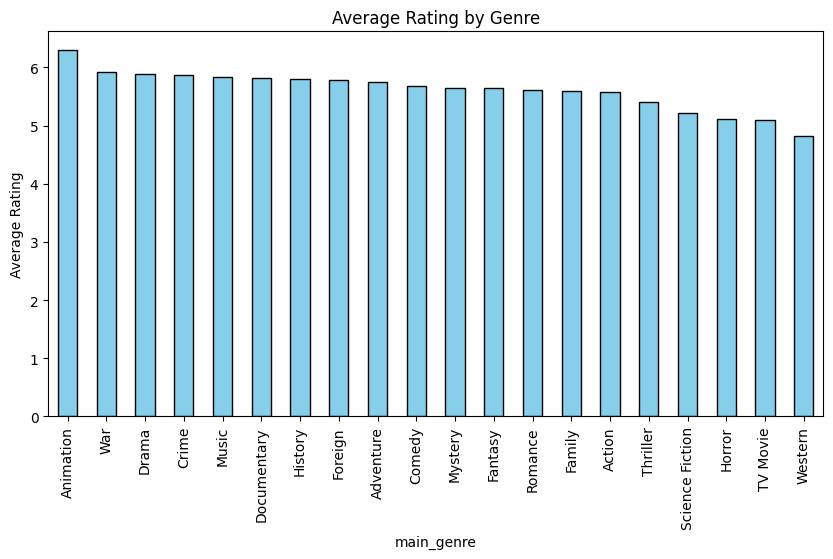

In [18]:
import matplotlib.pyplot as plt
genre_group.plot(kind="bar", figsize=(10,5), color="skyblue", edgecolor="black")
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.show()


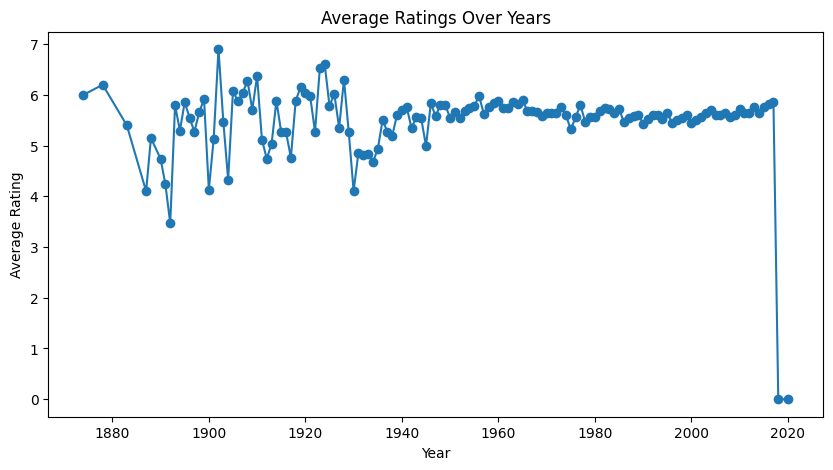

In [19]:
yearly_ratings.plot(kind="line", figsize=(10,5), marker="o")
plt.title("Average Ratings Over Years")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


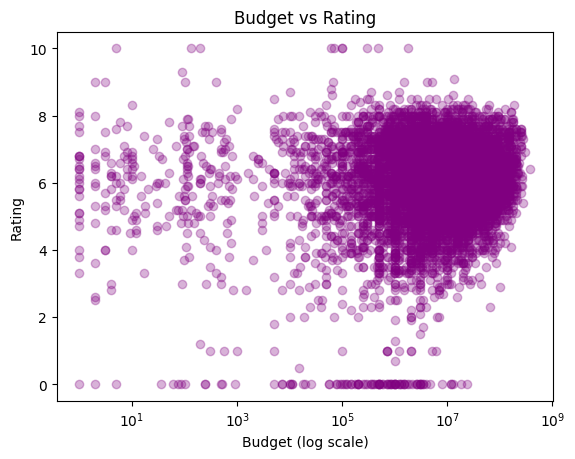

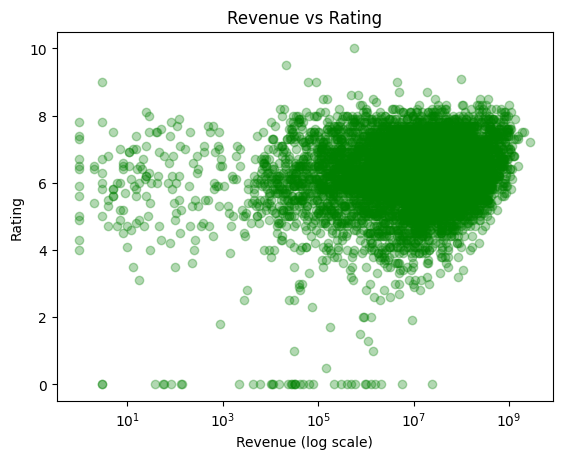

In [20]:
plt.scatter(df["budget"], df["vote_average"], alpha=0.3, color="purple")
plt.xscale("log")
plt.xlabel("Budget (log scale)")
plt.ylabel("Rating")
plt.title("Budget vs Rating")
plt.show()

plt.scatter(df["revenue"], df["vote_average"], alpha=0.3, color="green")
plt.xscale("log")
plt.xlabel("Revenue (log scale)")
plt.ylabel("Rating")
plt.title("Revenue vs Rating")
plt.show()


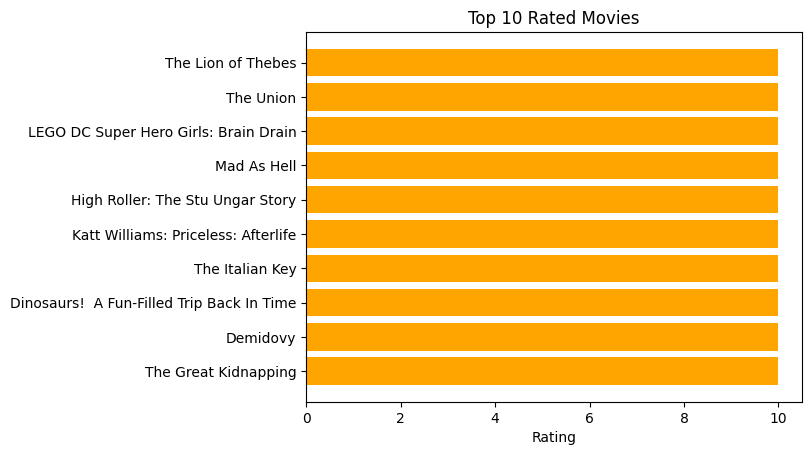

In [21]:
top_movies = df.sort_values("vote_average", ascending=False).head(10)
plt.barh(top_movies["title"], top_movies["vote_average"], color="orange")
plt.xlabel("Rating")
plt.title("Top 10 Rated Movies")
plt.gca().invert_yaxis()  # highest at top
plt.show()
